# Python essentials and understanding measurement uncertainty

## Objectives of this exercise

1. **Review essential Python skills for data analysis**  
   - Reading and manipulating data files  
   - Indexing, type conversion, and plotting with `numpy` and `matplotlib`
2. **Work with real astronomical data**  
   - Explore light curves from a real astronomical survey. 
   - Visualize variability and basic descriptive statistics (mean, standard deviation, min, max)
3. **Understand uncertainty in measurements**  
   - Learn the difference between **standard deviation** and **standard error**  
   - Practice calculating the uncertainty on simple and composite quantities (mean, difference between 2 measurements affected by uncertainties)
4. **Develop problem-solving skills**  
   - Apply a structured methodology to clean, analyze, and summarize data  
   - Prepare for future lectures on statistical inference and error propagation

## Why this matters

In modern astrophysics and data science, the ability to **read, clean, and analyze real observational data** is essential. These skills form the foundation for everything from detecting exoplanets to studying variable stars and gravitational lenses. By learning how to handle data and calculate uncertainties correctly, you are preparing for more advanced tasks like building models, interpreting results, and contributing to cutting-edge research. This exercise is not just about coding—it’s about developing the mindset and tools needed to turn raw measurements into scientific insight.

## Exercise: 

Read the data file `Variability_Catalina_list1.csv` which contains lightcurves of an ensemble of objects observed in the context of the Catalina survey (http://nesssi.cacr.caltech.edu/DataRelease/). 

This file contains the following columns separated by 'tab' characters: `InputID	ID	Mag	Magerr	RA	Decl	MJD	Blend`. Their meaning is the following: 
* [0] `InputID`: Object Name 
* [1] `ID`: Object ID in the survey
* [2] `Mag`: Object Magnitude ($ m = -2.5 * \log(Flux)$ + zeropoint)
* [3] `Magerr`: Formal error on the magnitude
* [4] `RA`: Right ascension  (degrees)
* [5] `Decl`: Declination  (degrees)
* [6] `MJD`: Modified julian day (day). 
* [7] `Blend`: 0 if the measurement is clean, 1 if there is a possible contamination by another target. 

The file contains the observed magnitude of the following (gravitationally lensed) quasars: 'DESJ0407-5006', 'HE1104-1805', 'HS2209+1914' 'J0011-0845', 'J0228+3953', 'Q1355-2257', 'SDSSJ0904+1512'. 
You want to visualise the lightcurve (x=MJD, y=Mag, yerr=Maggerr) associated to each individual object. You also want to measure its mean magnitude, and the standard deviation on the magnitude, as well as its minimum / maximum magnitude over the period of observation and save those value into a table. 

Based on this, how would you proceed to calculate the following quantities: 
- Standard Error on the mean magnitude
- Standard Error on the amplitude variability of the object  

Try to reach this goal using only "standard" python commands and commands from numpy and matplotlib arrays. To ease your task, a possible methodology is outlined below.  

**Possible methodology:**
- (1) Read the file and save the output into a numpy array. How many rows and columns does contain the array ? What is the dtype of your array ? 
- (2) Create a sub-array for a single object, HS2209+1914,  using fancy indexing. 
- (3) Create an array with 4 columns `MJD, Mag, magerr, blend` , converting strings to floats.
- (4) Get rid of data points with `Blend` > 0 
- (5) Plot the lightcurve with error bars on the data points at the screen 
- (6) Calculates for the lightcurve the mean, std, min, max with numpy
- (7) Calculate the standard error on the mean magnitude, and on the maximum amplitude of variation (i.e. difference between the maximum and minimum magnitude). How does the standard error on the mean compare to the mean uncertainty on the data points? Post your result on the form provided by the teacher. 
- (8) Repeat the operation for the 7 objects using a `for loop`: i.e. you can create a list of arrays, each one containing `MJD, mag, magerr` of the object. You can generate a plot within the same look. To plot into a single figure, you can consider using `plt.subplots(rows=7, figsize=(15,20))`.

- BONUS:    
  * (a) How would you proceed to know the names of the individual objects if I did not provide the list ?
  * (b) Display on the figure the mean and the undertainty in the mean.
  * (c) What is the formula of the standard deviation? What does the standard deviation represent? 

**TIPs:** 

* A file's row mixes strings and floats. You may therefore first create an array of strings (1 single dtype in an array). One of the arguments of `np.loadtxt()` is the data type, so you can read a list of strings with `np.loadtxt(filename, dtype=str)`
* To convert an array of numbers whose type is strings into float: 
``` python 
myarray_strings = np.array(['1', '2', '3'])  
myarray_floats = np.array(myarray_strings , dtype = float)
```

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**(1) Read the file and save the output into a numpy array**. How many rows and columns does contain the array ? What is the dtype of your array ? 

In [2]:
data_file = 'Variability_Catalina_list1.csv'
data = np.loadtxt(data_file, dtype=str)

In [3]:
data

array([['J0011-0845', '1009002045103', '19.19', ..., '-8.76392',
        '53711.14915', '0'],
       ['J0011-0845', '1009002045103', '19.17', ..., '-8.76410',
        '53711.15716', '0'],
       ['J0011-0845', '1009002045103', '20.03', ..., '-8.76453',
        '53677.20006', '0'],
       ...,
       ['HS2209+1914', '1118114081112', '15.37', ..., '19.48718',
        '56587.16828', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48713',
        '56587.17481', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48708',
        '56587.18086', '0']], dtype='<U14')

In [4]:
data.shape

(2308, 8)

Note that `np.loadtxt()` would allow you to directly create 2 arrays: one array containing only characters (i.e. `dtype=str`) associated to the object names, and one arrays with floats corresponding to the quantities of interest. This allows you to skip the conversion step (as performed below). 

In [5]:
# Alternative [not used in the following]
datanames = np.loadtxt(data_file, dtype=str, usecols=(0))  # Read the names in the first col
datavalues = np.loadtxt(data_file, dtype=float, usecols=range(1,8))    # read the other columns directly as floats
datanames, datavalues
                       

(array(['J0011-0845', 'J0011-0845', 'J0011-0845', ..., 'HS2209+1914',
        'HS2209+1914', 'HS2209+1914'], dtype='<U14'),
 array([[ 1.00900205e+12,  1.91900000e+01,  1.90000000e-01, ...,
         -8.76392000e+00,  5.37111491e+04,  0.00000000e+00],
        [ 1.00900205e+12,  1.91700000e+01,  1.90000000e-01, ...,
         -8.76410000e+00,  5.37111572e+04,  0.00000000e+00],
        [ 1.00900205e+12,  2.00300000e+01,  2.90000000e-01, ...,
         -8.76453000e+00,  5.36772001e+04,  0.00000000e+00],
        ...,
        [ 1.11811408e+12,  1.53700000e+01,  6.00000000e-02, ...,
          1.94871800e+01,  5.65871683e+04,  0.00000000e+00],
        [ 1.11811408e+12,  1.53300000e+01,  6.00000000e-02, ...,
          1.94871300e+01,  5.65871748e+04,  0.00000000e+00],
        [ 1.11811408e+12,  1.53300000e+01,  6.00000000e-02, ...,
          1.94870800e+01,  5.65871809e+04,  0.00000000e+00]]))

A third possibility to read the array would be to use `astropy.table()`  but the goal of this exercise is really to work with numpy array so we will not detail that solution. The cell below will show how to read the table with astropy and then create an array from the astropy table. The procedure would be as follows.

In [6]:
from astropy.table  import Table 
data_tab = Table.read(data_file, format='ascii', )
data_tab

InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
str14,int64,float64,float64,float64,float64,float64,int64
J0011-0845,1009002045103,19.19,0.19,2.83433,-8.76392,53711.14915,0
J0011-0845,1009002045103,19.17,0.19,2.83464,-8.7641,53711.15716,0
J0011-0845,1009002045103,20.03,0.29,2.83461,-8.76453,53677.20006,0
J0011-0845,1009002045103,19.71,0.25,2.83457,-8.76412,53677.21198,0
J0011-0845,1009002045103,18.85,0.16,2.83509,-8.76393,53704.2,0
J0011-0845,1009002045103,20.11,0.31,2.83421,-8.76462,53704.20858,0
J0011-0845,1009002045103,19.31,0.21,2.8345,-8.76421,53648.28483,0
J0011-0845,1009002045103,19.33,0.22,2.83428,-8.7642,53648.29019,0
J0011-0845,1009002045103,19.62,0.25,2.83446,-8.76405,53648.29558,0


In [8]:
# we can then create an array with 4 columns containing MJD, mag, magerr, blend as follows

data_from_tab = np.array([data_tab['MJD'], data_tab['Mag'], data_tab['Magerr'], data_tab['Blend']], dtype=float)
obj_name_from_tab = np.array(data_tab['InputID'])

In [11]:
# let's have a look to the created arrays with obj. names
obj_name_from_tab, obj_name_from_tab.shape

(array(['J0011-0845', 'J0011-0845', 'J0011-0845', ..., 'HS2209+1914',
        'HS2209+1914', 'HS2209+1914'], dtype='<U14'), (2308,))

In [12]:
# let's have a look to the created arrays with the columns of interes
data_from_tab, data_from_tab.shape

(array([[5.37111491e+04, 5.37111572e+04, 5.36772001e+04, ...,
         5.65871683e+04, 5.65871748e+04, 5.65871809e+04],
        [1.91900000e+01, 1.91700000e+01, 2.00300000e+01, ...,
         1.53700000e+01, 1.53300000e+01, 1.53300000e+01],
        [1.90000000e-01, 1.90000000e-01, 2.90000000e-01, ...,
         6.00000000e-02, 6.00000000e-02, 6.00000000e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), (4, 2308))

**(2) Create a sub-array for a single object (e.g. HS2209+1914)** using fancy indexing. 

I identify the unique object names in my array. (THIS IS THE ANSWWER TO THE first question of the **BONUS**)

In [7]:
objnames = data[:,0]
objnames

array(['J0011-0845', 'J0011-0845', 'J0011-0845', ..., 'HS2209+1914',
       'HS2209+1914', 'HS2209+1914'], dtype='<U14')

In [8]:
list_of_objects = list(set(objnames))
list_of_objects

['Q1355-2257',
 'SDSSJ0904+1512',
 'HE1104-1805',
 'J0011-0845',
 'J0228+3953',
 'DESJ0407-5006',
 'HS2209+1914']

I want to create a list of arrays containing MJD, mag, magerr for each object, removing observations with blend > 0.   
For this purpose, let's first see how to select the rows associated to a single object using fancy indexing: 

In [9]:
objnames == 'HS2209+1914'

array([False, False, False, ...,  True,  True,  True])

In [10]:
# Let's save this condition into a mask 
mask = objnames == 'HS2209+1914'
mask.shape

(2308,)

In [12]:
# And now let's apply it to our data array 
data_HS2209 = data[data[:,0] == 'HS2209+1914']
# data_HS2209 = data[mask]   # alternative syntax
data_HS2209

array([['HS2209+1914', '1118114081112', '15.33', ..., '19.48714',
        '53480.47892', '0'],
       ['HS2209+1914', '1118114081112', '15.32', ..., '19.48717',
        '53480.48282', '0'],
       ['HS2209+1914', '1118114081112', '15.31', ..., '19.48713',
        '53480.48672', '0'],
       ...,
       ['HS2209+1914', '1118114081112', '15.37', ..., '19.48718',
        '56587.16828', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48713',
        '56587.17481', '0'],
       ['HS2209+1914', '1118114081112', '15.33', ..., '19.48708',
        '56587.18086', '0']], dtype='<U14')

**(3) create an array with 4 columns** `MJD, Mag, magerr, blend` , converting strings to floats.

In [13]:
col_of_interest = np.array([6, 2, 3, 7])   # MJD=col[6], Mag=col[2], Magerr=col[3], Blend=col[7]
lightcurve_HS2209 = np.array(data_HS2209[:, col_of_interest], dtype=float)

In [15]:
# Alternative command set to convert to floats 
subarray = data_HS2209[:, col_of_interest]
subarray_float = subarray.astype(float)

In [16]:
# FYI: If you want to check wether the latter cells yields views or copies
np.shares_memory(subarray, data), np.shares_memory(subarray, data_HS2209)

(False, False)

In [17]:
# But beware that if you had selected only e.g. the 1st column, 
# the behaviour would have been different (don't ask why)
test_subarray = data_HS2209[:, 0]
np.shares_memory(test_subarray, data_HS2209) # This is now a view 

True

**(4) Get rid of data points with Blend > 0** 
We can use fancy indexing ! `lightcurve_HS2209[:,3] < 1` will return an array of booleans for which blend == 0. 

In [18]:
lightcurve_HS2209.shape

(371, 4)

In [19]:
lightcurve_HS2209.dtype

dtype('float64')

In [20]:
lightcurve_HS2209 = lightcurve_HS2209[lightcurve_HS2209[:,3] < 0.1]   

In [21]:
lightcurve_HS2209.shape

(371, 4)

**(5) Plot the lightcurve at the screen**

Text(0, 0.5, 'Mag')

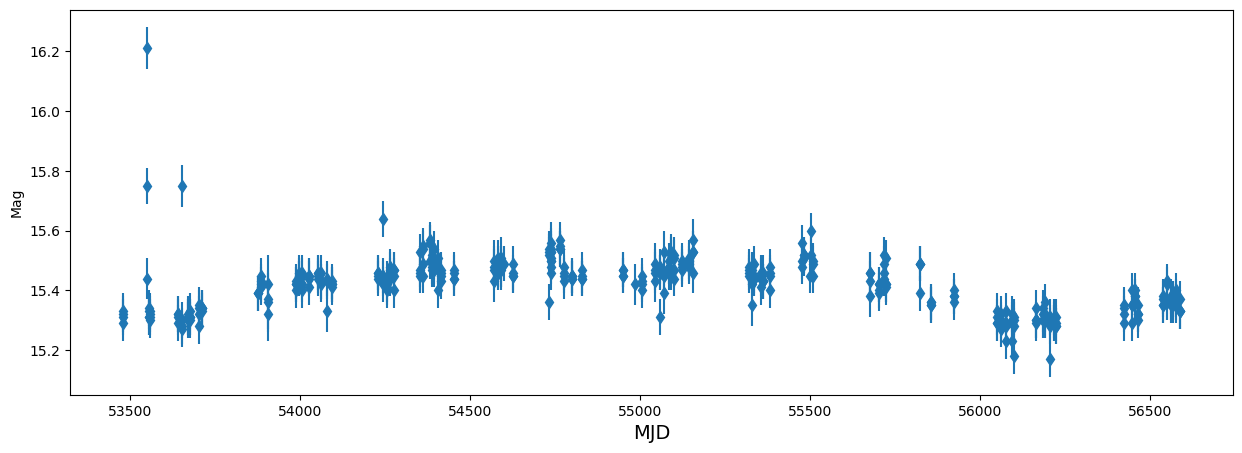

In [22]:
f, ax = plt.subplots(nrows=1, figsize=(15,5))
ax.errorbar(lightcurve_HS2209[:,0], lightcurve_HS2209[:,1], yerr=lightcurve_HS2209[:,2], ls='', marker='d')
ax.set_xlabel('MJD', fontsize=14)
ax.set_ylabel('Mag')

**(6) Calculates mean, std, min, max with numpy** 

In [45]:
#print('Mean = %.2f mag' %lightcurve_HS2209[:,1].mean())
print('Mean = %.4f mag' %np.nanmean(lightcurve_HS2209[:,1]))  # an alternative that enable to manage nan 
print('Std = %.2f mag' %lightcurve_HS2209[:,1].std())
print('Min = %.2f mag' %lightcurve_HS2209[:,1].min())
print('Max = %.2f mag' %lightcurve_HS2209[:,1].max())

Mean = 15.4187 mag
Std = 0.09 mag
Min = 15.17 mag
Max = 16.21 mag


Save those values into an array (for which the first column will be an arbitrary float ID

In [24]:
res = np.zeros(5, dtype=float)
res[1] = lightcurve_HS2209[:,1].mean()
res[2] = lightcurve_HS2209[:,1].std()
res[3] = lightcurve_HS2209[:,1].min()
res[4] = lightcurve_HS2209[:,1].max()

Amplitude of variation of the object: 

In [39]:
print('Amplitude of variation of the object: %.3f mag'%(res[4] - res[3]))

Amplitude of variation of the object: 1.040 mag


(7) Calculate the standard error on the mean, and the maximum amplitude. 

/!\ The standard error on the mean is NOT the standard deviation. By definition the variance is $\sigma^2 = \sum_{i=1}^{N} \frac{(x_i-\bar{x})^2}{N}$, and the standard deviation is it square-root, $\sigma$. It tells us how much the data points scatter around the mean value. If we do an histogram of the data points, it will be the half-width of the histogram. When $\bar{x}$ is estimated from the data points themselves, we have in fact  $\hat{\sigma}^2 = \sum_{i=1}^{N} \frac{(x_i-\bar{x})^2}{N-1}$ (Bessel correction). For that reason, we should in fact `lightcurve_HS2209[:,1].std(ddof=1)`. This does not make a big difference in the present case. This is will be rediscussed in a future lecture.  

In [25]:
print('Std (corrected) = %.2f mag' %lightcurve_HS2209[:,1].std(ddof=1))

Std (corrected) = 0.09 mag


Text(0, 0.5, 'density')

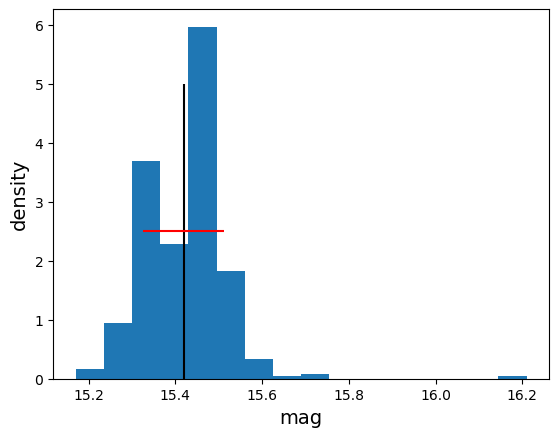

In [31]:
plt.hist(lightcurve_HS2209[:,1], density=True, bins=16)
plt.vlines(res[1], 0, 5)
plt.hlines(2.5, res[1] - res[2], res[1] + res[2], color='red') # illustration of the scatter
plt.xlabel('mag', fontsize=14)
plt.ylabel('density', fontsize=14)

Text(0, 0.5, 'Mag')

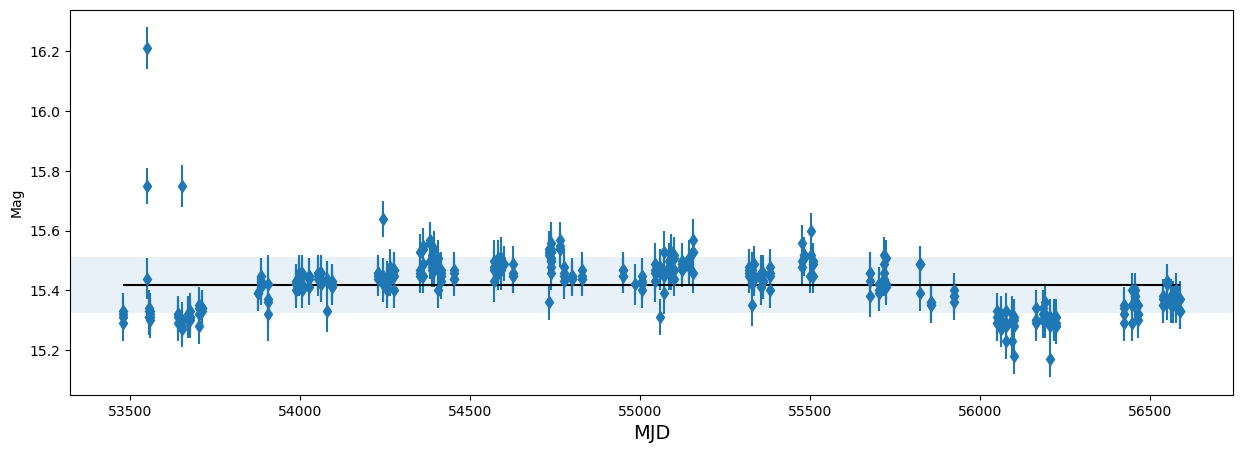

In [32]:
f, ax = plt.subplots(nrows=1, figsize=(15,5))
ax.errorbar(lightcurve_HS2209[:,0], lightcurve_HS2209[:,1], yerr=lightcurve_HS2209[:,2], ls='', marker='d')
ax.hlines(res[1], lightcurve_HS2209[0,0], lightcurve_HS2209[-1,0])
ax.axhspan(res[1] - res[2], res[1] + res[2], alpha=0.1)
ax.set_xlabel('MJD', fontsize=14)
ax.set_ylabel('Mag')

In [33]:
# Comparison of std with the mean uncertainty on the data points 
mean_err = lightcurve_HS2209[:,2].mean()
print('Mean uncertainty on the data points = %.2f'%mean_err)

Mean uncertainty on the data points = 0.06


The standard error on the means is the uncertainty on the mean value of the histogram. . $stde = \sigma / \sqrt{N}$

In [37]:
stde_mean = res[2] / len(lightcurve_HS2209[:,1])
print('stde = %.4f'%stde_mean )

stde = 0.0003


Because we have a lot of data points the mean is known to high precision !  

In [43]:
# Uncertainty on the amplitude of variation
# We need to use the error propagation formula 
id_min = np.argmin(lightcurve_HS2209[:,1])
id_max = np.argmax(lightcurve_HS2209[:,1])
# check that the above command gives the id of the min and max
print('min = %.3f , max= %.3f '%(lightcurve_HS2209[id_min,1], lightcurve_HS2209[id_max,1]))
delta = lightcurve_HS2209[id_max,1] - lightcurve_HS2209[id_min,1]
sigma_min = lightcurve_HS2209[id_min,2] # uncertainty on the minimum
sigma_max = lightcurve_HS2209[id_max,2] # uncertainty on the minimum
err_amp = np.sqrt(sigma_min**2 + sigma_max**2)
print('Amplitude= %.3f +/- %.3f' %(delta, err_amp))

min = 15.170 , max= 16.210 
Amplitude= 1.040 +/- 0.092


We see that the amplitude of variation (1.04 mag) is much larger than the std of the object (0.09 mag). This is is an indication that there is something odd with the data. 
In fact, we see a few points at the beginning of the survey that deviate significantly from the others. Those points may bias the value of the mean but also our estimate of the amplitude of variation of the object. Those data points might be outliers. Special care will be required to deal with it.  

=> TAKE HOMES: 
- Stdev is NOT the uncertainty on the mean
- Think about your data and about what is asked. Do your results make sense?
- If needed you may have to clean your data from outliers (we will discuss about methods to tackle those)  
- To propagate uncertainties, we can use error propagation formula

(8) **Repeat the operation for the 7 objects** using a for loop.i.e. you can create a list of arrays, each one containing `MJD, mag, magerr` for each object. In the same loop you can make a plot. You can include the plotting in the loop. To plot into a single figure, think of using `plt.subplots(rows=7, figsize=(15,20))`. 

Now, we generalise to all the objects, and create a single figure with all the targets. 

Ideally, instead of putting everything into a big cell, you would create a function that calculates the quantities of interest and make the plots. 

Text(0.5, 0, 'MJD')

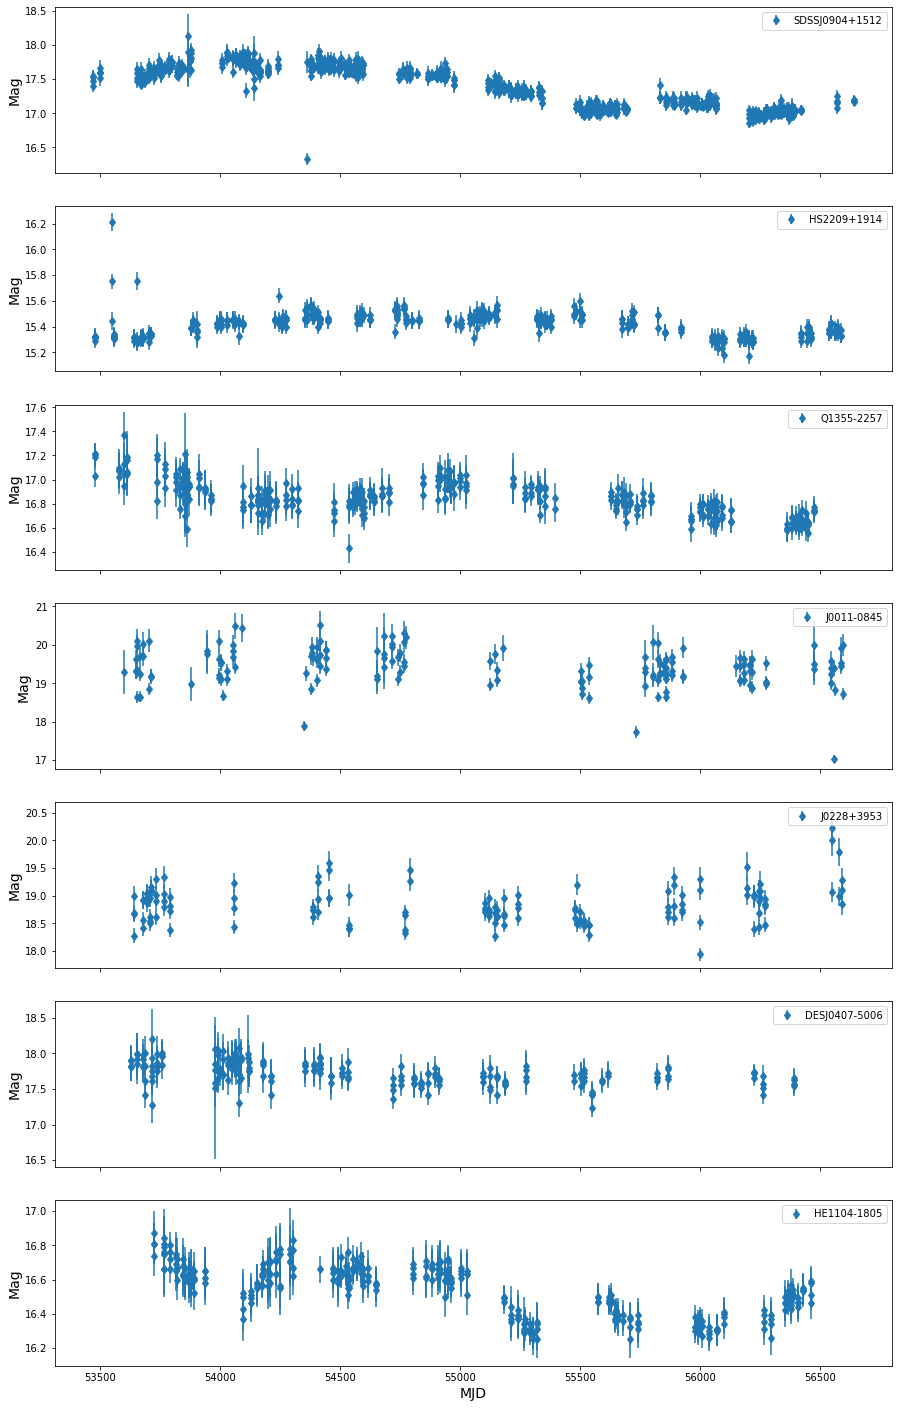

In [32]:
lightcurves = []  # I'll make a list of lcves, each entry in the list being a lcve associated to a given object
f, ax = plt.subplots(nrows=7, figsize=(15,25), sharex=True)
res = np.zeros(shape=(7,5))  # 7 objects, 5 columns: ID, mean, std, min, max
for i, objname in enumerate(list_of_objects):
    data_sub = data[data[:,0]==objname]  # select the object of interest
    lcv = np.array(data_sub[:, col_of_interest], dtype=float)   # Create a subarray with the associated lcve
    lcv = lcv[lcv[:,3] < 0.1]   # Remove the blends 
    lightcurves.append(lcv)   # Append the lcve to the list
    # Save summary information on each object into a list 
    res[i, 0] = i                
    res[i, 1] = lcv[:,1].mean()
    res[i, 2] = lcv[:,1].std()
    res[i, 3] = lcv[:,1].min()
    res[i, 4] = lcv[:,1].max()
    # plot the lightcurves for each object 
    ax[i].errorbar(lcv[:,0], lcv[:,1], yerr=lcv[:,2], ls='', marker='d', label=objname)
    ax[i].set_ylabel('Mag', fontsize=14)   # add ylabel
    ax[i].legend()   # add legent
ax[6].set_xlabel('MJD', fontsize=14)  # add xlabel 

The table with the results of interest

In [33]:
res

array([[ 0.        , 17.38941476,  0.29853487, 16.33      , 18.13      ],
       [ 1.        , 15.4187062 ,  0.09287819, 15.17      , 16.21      ],
       [ 2.        , 16.85125   ,  0.13809504, 16.43      , 17.37      ],
       [ 3.        , 19.41538462,  0.48859477, 17.04      , 20.52      ],
       [ 4.        , 18.8423913 ,  0.33894456, 17.94      , 20.22      ],
       [ 5.        , 17.73141414,  0.1630115 , 17.24      , 18.21      ],
       [ 6.        , 16.54213376,  0.14620758, 16.25      , 16.87      ]])

In [22]:
np.savetxt('results_lcves.txt', res)